# VEST MI 2020 - US President and US Senate

In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt

## VEST Documentation

### Sources:

Election results from the Michigan Secretary of State (https://miboecfr.nictusa.com/cgi-bin/cfr/precinct_srch.cgi)  
Precinct shapefile from the Michigan GIS Open Data site (https://gis-michigan.opendata.arcgis.com/datasets/49eb37d0a4294924bf8ef5ffe0eac47e_6/)  

### Notes:

Some counties report "Statistical Adjustments" with their precinct results, which can either be positive or negative. Many of these are related to cities that span county lines, as they often match precinct results of these county-spanning cities. In some cases these adjustments cancel each other out across the two counties that share the city, but some (notably Clinton County's East Lansing and Eaton County's Lansing adjustments) are not reciprocated, which introduces error to statewide totals. Other than these, there appears to be a handful of tiny adjustments that were made to make the precinct totals match official countywide totals. None of these adjustments of any type were distributed to precincts, which may result in candidate totals being slightly off official totals.

Write-in vote totals have been excluded, since in most cases, a large share of their votes are accounted for via statistical adjustments.

### Processing

In several cases, cities that overlapped county lines reported results in each county, but the shapefile had a single precinct. These were split at the county line in the shapefile and the two sets of results assigned accordingly.
Claire city - Isabella/Clare
Brown city - Lapeer/Sanilac
Fenton city - Oakland/Genesee
Richmond city - St. Clair/Macomb

Berrien: the results for Sodus and St. Joseph townships appear to have been flipped, these were corrected
Ottawa: via contact with the Park Township clerk's office, precinct 9 in the state shapefile has been renumbered to precinct 4
Wayne: Detroit reports absentee votes via Absent Voter Counting Boards. The linkage file of boards to precincts is from OpenElections (https://github.com/openelections/openelections-sources-mi/tree/master/2020), and votes were distributed to precincts proportionally by election day vote.

### Races

G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRENDEL - Rocky De La Fuente (Natural Law Party)  
G20PRETBLA - Don Blankenship (US Taxpayers Party)  

G20USSRJAM - John James (Republican Party)  
G20USSDPET - Gary Peters (Democratic Party)  
G20USSGSQU - Marcia Squier (Green Party)  
G20USSNDER - Doug Dern (Natural Law Party)  
G20USSTWIL - Valerie L. Willis (US Taxpayers Party)  

## Load VEST File

In [2]:
vest_mi_20 = gp.read_file('./raw_from_source/mi_2020/mi_2020.shp')
vest_mi_20.head()

,PRECINCTID,COUNTYFIPS,cousubname,elexpre,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRENDEL,G20PRETBLA,G20USSRJAM,G20USSDPET,G20USSGSQU,G20USSNDER,G20USSTWIL,geometry
0,WP-001-01040-00001,001,Alcona township,001-ALCONA TOWNSHIP-0-0001,564,248,3,2,0,2,539,267,4,2,3,"POLYGON ((-83.29467 44.77346, -83.29577 44.773..."
1,WP-001-12460-00001,001,Caledonia township,001-CALEDONIA TOWNSHIP-0-0001,508,245,4,0,0,0,485,261,1,0,4,"POLYGON ((-83.64206 44.81382, -83.64578 44.813..."
2,WP-001-19320-00001,001,Curtis township,001-CURTIS TOWNSHIP-0-0001,486,238,2,1,0,1,456,240,5,4,10,"POLYGON ((-83.64530 44.51091, -83.64918 44.510..."
3,WP-001-34820-00001,001,Greenbush township,001-GREENBUSH TOWNSHIP-0-0001,560,302,9,1,0,1,531,322,4,5,6,"POLYGON ((-83.31858 44.51165, -83.32054 44.511..."
4,WP-001-35740-00001,001,Gustin township,001-GUSTIN TOWNSHIP-0-0001,317,112,9,0,0,0,306,122,1,0,6,"POLYGON ((-83.40227 44.59806, -83.41508 44.598..."


## Election Results

In [3]:
vest_mi_20.columns

Index(['PRECINCTID', 'COUNTYFIPS', 'cousubname', 'elexpre', 'G20PRERTRU',
       'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW', 'G20PRENDEL', 'G20PRETBLA',
       'G20USSRJAM', 'G20USSDPET', 'G20USSGSQU', 'G20USSNDER', 'G20USSTWIL',
       'geometry'],
      dtype='object')

### All candidates in election results file:

**2020:GEN:1:00000:0:-1417:WELLS:KASEY::NPA:  
**2020:GEN:1:00000:0:-1416:HOEFLING:TOM::NPA:  
**2020:GEN:1:00000:0:-1415:HUNTER:TARA RENEE::NPA:  
**2020:GEN:1:00000:0:-1414:CARROLL:BRIAN:T.:NPA:  
**2020:GEN:1:00000:0:-1413:SIMMONS:JADE::NPA:**  
2020:GEN:1:00000:0:-1403:TRUMP:DONALD:J.:REP:  
2020:GEN:1:00000:0:-1401:BIDEN:JOSEPH:R.:DEM:  
2020:GEN:1:00000:0:-1398:DE LA FUENTE:ROCKY::NLP:  
2020:GEN:1:00000:0:-1391:BLANKENSHIP:DON::UST:  
2020:GEN:1:00000:0:-1385:JORGENSEN:JO::LIB:  
2020:GEN:1:00000:0:-1373:HAWKINS:HOWIE::GRN:  
**2020:GEN:5:00000:0:-1419:GADZINSKI:LEONARD:PAUL:NPA:  
**2020:GEN:5:00000:0:-1400:CARR:ROBERT:WILLIAM:NPA:**  
2020:GEN:5:00000:0:-1397:DERN:DOUG::NLP:  
2020:GEN:5:00000:0:-1393:WILLIS:VALERIE:L.:UST:  
2020:GEN:5:00000:0:-1365:SQUIER:MARCIA::GRN:  
2020:GEN:5:00000:0:-1304:PETERS:GARY::DEM:  
2020:GEN:5:00000:0:-1283:JAMES:JOHN::REP:  

In [4]:
## Load + Process format
df = pd.read_csv('./raw_from_source/2020GEN/2020vote.txt', delimiter = '\t', header = None)

#columns defined in documentation
df.columns = ['election_year','election_type','office_code','district_code',
            'status_code','candidate_id','county_code','city_town_code','ward_number',
            'precinct_number','precinct_label','precinct_votes','na_col']

In [5]:
print(df["candidate_id"].unique())

[     0  -1417  -1416  -1415  -1414  -1413  -1403  -1401  -1398  -1391
  -1385  -1373  -1419  -1400  -1397  -1393  -1365  -1304  -1283  -1375
  -1337  -1311  -1394  -1376  -1366  -1331  -1328  -1409  -1384  -1340
  -1334  -1377  -1367  -1341  -1339  -1388  -1378  -1346  -1319  -1410
  -1379  -1368  -1330  -1282  -1347  -1338  -1380  -1332  -1316  -1411
  -1387  -1381  -1335  -1312  -1358  -1322  -1412  -1382  -1349  -1315
  -1389  -1359  -1313  -1418  -1396  -1395  -1370  -1356  -1336  -1390
  -1383  -1369  -1353  -1318 518090 519192 519856 517132 517721 519635
 519290 519700 519882 519649 519686 519849 519878 518602 519754 518599
 518795 519473 519880 519883 519270 519689 518487 519701 517840 519613
 517924 519685 518423 519690 519287 519695 517612 519687 519881 517414
 519748 519879 518564 519762 517544 519429 517236 519664 519679 518084
 519387 518402 519509 519214 519693 519431 519731 517302 519751 517481
 519469 518419 519590 517453 519628 519355 519528 519773 519853 518407
 51959

In [6]:
df['office_code'].unique()

array([ 0,  1,  5,  6,  8,  9, 10, 11, 12, 13, 90])

In [7]:
#Processing
#Filter to office code `1` for president
df = df[(df['office_code'] == 1)|(df['office_code'] == 5)]

In [8]:
df["candidate_id"].unique()

df = df[~df["candidate_id"].isin([-1417,-1416,-1415,-1414,-1413,-1419,-1400])]

In [9]:


#Have to replace NaNs in `precinct_label` with empty strings so that we can use it as an index in the pivot
df['precinct_label'] = df['precinct_label'].replace(np.nan, '', regex = True)

In [10]:
df["precinct_label"].unique()

array(['', 'N', 'S', 'W', 'AVCB', 'A', 'B', 'C'], dtype=object)

In [11]:
## PIVOT RESULTS
df_pivot = df.pivot_table(index = ['county_code','city_town_code','ward_number','precinct_number','precinct_label'],
                         columns = ['candidate_id'],
                        values = ['precinct_votes'],
                         aggfunc = 'sum')
df_pivot.reset_index(inplace = True,drop=False)

In [12]:
df_pivot.columns

MultiIndex([(    'county_code',    ''),
            ( 'city_town_code',    ''),
            (    'ward_number',    ''),
            ('precinct_number',    ''),
            ( 'precinct_label',    ''),
            ( 'precinct_votes', -1403),
            ( 'precinct_votes', -1401),
            ( 'precinct_votes', -1398),
            ( 'precinct_votes', -1397),
            ( 'precinct_votes', -1393),
            ( 'precinct_votes', -1391),
            ( 'precinct_votes', -1385),
            ( 'precinct_votes', -1373),
            ( 'precinct_votes', -1365),
            ( 'precinct_votes', -1304),
            ( 'precinct_votes', -1283)],
           names=[None, 'candidate_id'])

In [13]:
#df_pivot.columns = ['county_code','city_town_code','ward_number','precinct_number','precinct_label',
 #                   'G20PRERTRU','G20PREDBID', 'G20PRELJOR', 'G20PREGHAW', 'G20PRENDEL', 'G20PRETBLA','G20USSRJAM', 
  #                  'G20USSDPET', 'G20USSGSQU', 'G20USSNDER', 'G20USSTWIL']


candidate_id_dict = {(    'county_code',    ''):'county_code',( 'city_town_code',    ''):'city_town_code',
                     (    'ward_number',    ''):'ward_number',('precinct_number',    ''):'precinct_number',
                     ( 'precinct_label',    ''):'precinct_label',
                     ('precinct_votes', -1403):'G20PRERTRU', ('precinct_votes', -1401):'G20PREDBID',('precinct_votes', -1385):'G20PRELJOR', 
                    ('precinct_votes', -1373):'G20PREGHAW', ('precinct_votes', -1398):'G20PRENDEL',('precinct_votes', -1391):'G20PRETBLA', 
                    ('precinct_votes', -1283):'G20USSRJAM',('precinct_votes', -1304):'G20USSDPET',('precinct_votes', -1365):'G20USSGSQU', 
                    ('precinct_votes', -1397):'G20USSNDER',('precinct_votes', -1393):'G20USSTWIL'}

#candidate_id_dict.get(df_pivot.columns)
#df_pivot.columns.map(lambda x: candidate_id_dict.get(x))
df_pivot.columns = df_pivot.columns.map(candidate_id_dict)

In [14]:
df_pivot.columns

Index(['county_code', 'city_town_code', 'ward_number', 'precinct_number',
       'precinct_label', 'G20PRERTRU', 'G20PREDBID', 'G20PRENDEL',
       'G20USSNDER', 'G20USSTWIL', 'G20PRETBLA', 'G20PRELJOR', 'G20PREGHAW',
       'G20USSGSQU', 'G20USSDPET', 'G20USSRJAM'],
      dtype='object')

In [15]:
races = list(i for i in df_pivot.columns if "G20" in i)
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRENDEL',
 'G20USSNDER',
 'G20USSTWIL',
 'G20PRETBLA',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20USSGSQU',
 'G20USSDPET',
 'G20USSRJAM']

In [16]:
for race in races:
    df_pivot[race] = df_pivot[race].fillna(0)

## Statewide Total Check

In [17]:
#Function to check column/race totals
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [18]:
statewide_totals_check(vest_mi_20,df_pivot,races)

***Statewide Totals Check***
G20PRERTRU has a difference of 625.0 votes
	VEST: 2649859 votes
	SOURCES: 2649234.0 votes
G20PREDBID has a difference of 2567.0 votes
	VEST: 2804036 votes
	SOURCES: 2801469.0 votes
G20PRENDEL has a difference of 2.0 votes
	VEST: 2985 votes
	SOURCES: 2983.0 votes
G20USSNDER has a difference of 6.0 votes
	VEST: 13093 votes
	SOURCES: 13087.0 votes
G20USSTWIL has a difference of 30.0 votes
	VEST: 50596 votes
	SOURCES: 50566.0 votes
G20PRETBLA has a difference of -27.0 votes
	VEST: 7204 votes
	SOURCES: 7231.0 votes
G20PRELJOR has a difference of 50.0 votes
	VEST: 60406 votes
	SOURCES: 60356.0 votes
G20PREGHAW has a difference of 13.0 votes
	VEST: 13718 votes
	SOURCES: 13705.0 votes
G20USSGSQU has a difference of 37.0 votes
	VEST: 39217 votes
	SOURCES: 39180.0 votes
G20USSDPET has a difference of 2517.0 votes
	VEST: 2734558 votes
	SOURCES: 2732041.0 votes
G20USSRJAM has a difference of 609.0 votes
	VEST: 2642221 votes
	SOURCES: 2641612.0 votes


## County Total Check

In [19]:
#### Add County Name
#The SOS results have county codes that are not FIPS codes. Pulled the `county.txt` file to a Sheet and lined it up with county fips codes from Wikipedia. Loading in this file created in Sheets. 
county_names = pd.read_csv('./raw_from_source/county_codes.csv')

In [20]:
county_names

,county_code,county_name,county_fips
0,1,ALCONA,1
1,2,ALGER,3
2,3,ALLEGAN,5
3,4,ALPENA,7
4,5,ANTRIM,9
...,...,...,...
78,79,TUSCOLA,157
79,80,VAN BUREN,159
80,81,WASHTENAW,161
81,82,WAYNE,163


In [21]:
county_names["county_fips"] = county_names["county_fips"].astype(str).str.zfill(3)
cty_code_dict = dict(zip(county_names["county_code"],county_names["county_fips"].str.zfill(3)))

In [22]:
df_pivot["COUNTYFIPS"] = df_pivot["county_code"].map(cty_code_dict).fillna("n/a")

In [23]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [24]:
county_totals_check(vest_mi_20,df_pivot,races,"COUNTYFIPS",full_print=False)

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	015 has a difference of -550.0 votes
		VEST: 22921 votes
		SOURCES: 23471.0 votes
	017 has a difference of 32.0 votes
		VEST: 33157 votes
		SOURCES: 33125.0 votes
	025 has a difference of -2.0 votes
		VEST: 36219 votes
		SOURCES: 36221.0 votes
	035 has a difference of 18.0 votes
		VEST: 10842 votes
		SOURCES: 10824.0 votes
	037 has a difference of 314.0 votes
		VEST: 25098 votes
		SOURCES: 24784.0 votes
	045 has a difference of 309.0 votes
		VEST: 31798 votes
		SOURCES: 31489.0 votes
	065 has a difference of -5.0 votes
		VEST: 47634 votes
		SOURCES: 47639.0 votes
	073 has a difference of -18.0 votes
		VEST: 14833 votes
		SOURCES: 14851.0 votes
	087 has a difference of -2.0 votes
		VEST: 35484 votes
		SOURCES: 35486.0 votes
	111 has a difference of -32.0 votes
		VEST: 27643 votes
		SOURCES: 27675.0 votes
	115 has a difference of 12.0 votes
		VEST: 52722 votes
		SOURCES: 52710.0 votes
	147 has a difference

## Precinct Totals Check

In [25]:
#### Add City/Township Name
#Loading in the `2016city.txt` file that has the corresponding names for the city codes in the election results file
city_codes = pd.read_csv('./raw_from_source/2020GEN/2020city.txt',delimiter='\t',header=None)
city_codes.columns = ['election_year','election_type','county_code','city_town_code','city_town_name','null']
city_codes.drop(['election_year','election_type','null'],axis=1,inplace=True)
df_pivot = df_pivot.merge(city_codes, on = ['county_code','city_town_code'])

In [26]:
city_codes

,county_code,city_town_code,city_town_name
0,1,2,ALCONA TOWNSHIP
1,1,4,CALEDONIA TOWNSHIP
2,1,6,CURTIS TOWNSHIP
3,1,8,GREENBUSH TOWNSHIP
4,1,10,GUSTIN TOWNSHIP
...,...,...,...
1613,83,30,SPRINGVILLE TOWNSHIP
1614,83,32,WEXFORD TOWNSHIP
1615,83,52,CADILLAC CITY
1616,83,54,MANTON CITY


In [27]:
df_pivot


,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name
0,1,2,0,1,,564.0,248.0,0.0,2.0,3.0,2.0,3.0,2.0,4.0,267.0,539.0,001,ALCONA TOWNSHIP
1,1,4,0,1,,508.0,245.0,0.0,0.0,4.0,0.0,4.0,0.0,1.0,261.0,485.0,001,CALEDONIA TOWNSHIP
2,1,6,0,1,,486.0,238.0,0.0,4.0,10.0,1.0,2.0,1.0,5.0,240.0,456.0,001,CURTIS TOWNSHIP
3,1,8,0,1,,560.0,302.0,0.0,5.0,6.0,1.0,9.0,1.0,4.0,322.0,531.0,001,GREENBUSH TOWNSHIP
4,1,10,0,1,,317.0,112.0,0.0,0.0,6.0,0.0,9.0,0.0,1.0,122.0,306.0,001,GUSTIN TOWNSHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,83,32,0,1,,490.0,166.0,0.0,5.0,3.0,2.0,6.0,0.0,3.0,163.0,485.0,165,WEXFORD TOWNSHIP
4919,83,52,0,1,,973.0,600.0,2.0,4.0,19.0,1.0,30.0,7.0,11.0,589.0,974.0,165,CADILLAC CITY
4920,83,52,0,2,,881.0,652.0,0.0,6.0,17.0,4.0,33.0,3.0,12.0,657.0,871.0,165,CADILLAC CITY
4921,83,52,0,3,,958.0,659.0,0.0,1.0,8.0,3.0,29.0,6.0,19.0,636.0,988.0,165,CADILLAC CITY


In [28]:
df_pivot["precinct_number"].unique()

array([   1, 9999,    2,    3,    9,   11,   12,   13,    4,    5,    6,
         10,   22,   23,    7,   18,   21,   15,   17,   19,    8,   20,
         14,   16,  302,  304,  305,  306,  501,   24,   25,   26,   27,
         28,   29,   30,   31,   32,   33,   34,   35,   36,   37,   38,
         39,   40,   41,   42,   43,   44,   45,   46,   47,   48,   49,
         50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
         61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
         72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
         83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
         94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
        105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
        116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
        127,  128,  129,  130,  131,  132,  133,  134,  251,  252,  253,
        254,  261,  262,  263,  264,  265,  266,  2

In [29]:
df_pivot[df_pivot["precinct_number"]==9999]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name
12,1,9999,0,9999,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,001,{Statistical Adjustments}
68,3,9999,0,9999,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,005,{Statistical Adjustments}
195,9,9999,0,9999,,-32.0,-35.0,0.0,0.0,0.0,0.0,-3.0,-1.0,-1.0,-32.0,-37.0,017,{Statistical Adjustments}
351,13,9999,0,9999,,2.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,5.0,025,{Statistical Adjustments}
373,14,9999,0,9999,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,027,{Statistical Adjustments}
394,15,9999,0,9999,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,029,{Statistical Adjustments}
436,17,9999,0,9999,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,033,{Statistical Adjustments}
456,18,9999,0,9999,,-18.0,-9.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-8.0,-19.0,035,{Statistical Adjustments}
491,19,9999,0,9999,,-314.0,-924.0,-1.0,-2.0,-3.0,0.0,-5.0,-4.0,-4.0,-892.0,-348.0,037,{Statistical Adjustments}
591,23,9999,0,9999,,-309.0,-1648.0,-2.0,-4.0,-27.0,-4.0,-19.0,-9.0,-33.0,-1636.0,-272.0,045,{Statistical Adjustments}


In [30]:
df_pivot

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name
0,1,2,0,1,,564.0,248.0,0.0,2.0,3.0,2.0,3.0,2.0,4.0,267.0,539.0,001,ALCONA TOWNSHIP
1,1,4,0,1,,508.0,245.0,0.0,0.0,4.0,0.0,4.0,0.0,1.0,261.0,485.0,001,CALEDONIA TOWNSHIP
2,1,6,0,1,,486.0,238.0,0.0,4.0,10.0,1.0,2.0,1.0,5.0,240.0,456.0,001,CURTIS TOWNSHIP
3,1,8,0,1,,560.0,302.0,0.0,5.0,6.0,1.0,9.0,1.0,4.0,322.0,531.0,001,GREENBUSH TOWNSHIP
4,1,10,0,1,,317.0,112.0,0.0,0.0,6.0,0.0,9.0,0.0,1.0,122.0,306.0,001,GUSTIN TOWNSHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,83,32,0,1,,490.0,166.0,0.0,5.0,3.0,2.0,6.0,0.0,3.0,163.0,485.0,165,WEXFORD TOWNSHIP
4919,83,52,0,1,,973.0,600.0,2.0,4.0,19.0,1.0,30.0,7.0,11.0,589.0,974.0,165,CADILLAC CITY
4920,83,52,0,2,,881.0,652.0,0.0,6.0,17.0,4.0,33.0,3.0,12.0,657.0,871.0,165,CADILLAC CITY
4921,83,52,0,3,,958.0,659.0,0.0,1.0,8.0,3.0,29.0,6.0,19.0,636.0,988.0,165,CADILLAC CITY


## Looking for unique ids

In [31]:
census = pd.read_excel('./raw_from_source/all-geocodes-v2020.xlsx',skiprows=[0,1,2,3])
#After `Place Code` != 0, repeat values, so want to filter that out. Then see that # unique values = 1520 for County Sub, indicating same as `Juris` in `shp`


In [32]:
census

,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description)
0,10,0,0,0,0,0,United States
1,40,1,0,0,0,0,Alabama
2,50,1,1,0,0,0,Autauga County
3,50,1,3,0,0,0,Baldwin County
4,50,1,5,0,0,0,Barbour County
...,...,...,...,...,...,...,...
43833,50,72,145,0,0,0,Vega Baja Municipio
43834,50,72,147,0,0,0,Vieques Municipio
43835,50,72,149,0,0,0,Villalba Municipio
43836,50,72,151,0,0,0,Yabucoa Municipio


In [33]:
censusmi = census[census['State Code (FIPS)'] == 26]

In [34]:
censusmi.loc[:,'Area Name (including legal/statistical area description)']=censusmi.loc[:,'Area Name (including legal/statistical area description)'].str.upper()

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [35]:
censusmi["city_town_name"] = censusmi['Area Name (including legal/statistical area description)']

<ipython-input-35-a326e46ddb2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusmi["city_town_name"] = censusmi['Area Name (including legal/statistical area description)']


In [36]:
censusmi["County Code (FIPS)"] = censusmi["County Code (FIPS)"].astype(str)
censusmi["join_id"] = censusmi["County Code (FIPS)"].str.zfill(3)+"-"+censusmi["city_town_name"]

<ipython-input-36-f866cccb227d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusmi["County Code (FIPS)"] = censusmi["County Code (FIPS)"].astype(str)
<ipython-input-36-f866cccb227d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusmi["join_id"] = censusmi["County Code (FIPS)"].str.zfill(3)+"-"+censusmi["city_town_name"]


In [37]:
df_pivot["join_id"] = df_pivot["COUNTYFIPS"] +"-"+df_pivot["city_town_name"] 

In [38]:
df_pivot["join_id"].value_counts()

163-DETROIT CITY         637
081-GRAND RAPIDS CITY     76
049-FLINT CITY            61
161-ANN ARBOR CITY        53
099-WARREN CITY           49
                        ... 
151-MARION TOWNSHIP        1
129-HORTON TOWNSHIP        1
075-CONCORD TOWNSHIP       1
133-MARION TOWNSHIP        1
067-DANBY TOWNSHIP         1
Name: join_id, Length: 1568, dtype: int64

In [39]:
censusmi["join_id"].value_counts()

051-BEAVERTON CITY         1
143-RICHFIELD TOWNSHIP     1
089-KASSON TOWNSHIP        1
153-GERMFASK TOWNSHIP      1
093-HARTLAND TOWNSHIP      1
                          ..
000-PORT AUSTIN VILLAGE    1
091-MACON TOWNSHIP         1
000-TWINING VILLAGE        1
017-MERRITT TOWNSHIP       1
159-BANGOR CITY            1
Name: join_id, Length: 2157, dtype: int64

In [40]:
stat_adjustments = df_pivot[df_pivot["precinct_number"]==9999]
non_stat_adjustments = df_pivot[df_pivot["precinct_number"]!=9999]

In [41]:
non_stat_adjustments.shape

(4889, 19)

In [42]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')

In [43]:
election_results_final["_merge"].value_counts()

both          3996
left_only      893
right_only       0
Name: _merge, dtype: int64

In [44]:
election_results_final[election_results_final["_merge"]=="left_only"].to_csv("./results_only.csv")
election_results_final[election_results_final["_merge"]=="right_only"].to_csv("./mcid_only.csv")

In [45]:
unjoined = list(election_results_final[election_results_final["_merge"]=="left_only"]["join_id"].unique())

In [46]:
non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("TOWNSHIP","CHARTER TOWNSHIP") if x in unjoined else x)

<ipython-input-46-4e50a1456921>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("TOWNSHIP","CHARTER TOWNSHIP") if x in unjoined else x)


In [47]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')

In [48]:
election_results_final["_merge"].value_counts()

both          4830
left_only       59
right_only       0
Name: _merge, dtype: int64

In [49]:
unjoined = list(election_results_final[election_results_final["_merge"]=="left_only"]["join_id"].unique())

In [50]:
non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("CITY","CITY CITY") if x in unjoined else x)

<ipython-input-50-158e5ade9d13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].apply(lambda x: str(x).replace("CITY","CITY CITY") if x in unjoined else x)


In [51]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')
election_results_final["_merge"].value_counts()

both          4869
left_only       20
right_only       0
Name: _merge, dtype: int64

In [52]:
unjoined = list(election_results_final[election_results_final["_merge"]=="left_only"]["join_id"].unique())

In [53]:
unjoined

['005-GUNPLAIN CHARTER TOWNSHIP',
 '013-LANSE CHARTER TOWNSHIP',
 '027-LA GRANGE CHARTER TOWNSHIP',
 '029-ST JAMES CHARTER TOWNSHIP',
 '037-DE WITT CHARTER TOWNSHIP',
 '037-DE WITT CITY CITY',
 '047-PLEASANT VIEW CHARTER TOWNSHIP',
 '079-COLD SPRINGS CHARTER TOWNSHIP',
 '099-GROSS POINTE SHORES CITY CITY',
 '125-CLARKSTON CITY CITY',
 '163-GROSSE POINTE SHORES CITY CITY']

In [54]:
id_changes_dict = {'005-GUNPLAIN CHARTER TOWNSHIP':'005-GUN PLAIN TOWNSHIP',
 '013-LANSE CHARTER TOWNSHIP':"013-L'ANSE TOWNSHIP",
 '027-LA GRANGE CHARTER TOWNSHIP':'027-LAGRANGE TOWNSHIP',
 '029-ST JAMES CHARTER TOWNSHIP':"029-ST. JAMES TOWNSHIP",
 '037-DE WITT CHARTER TOWNSHIP':"037-DEWITT CHARTER TOWNSHIP",
 '037-DE WITT CITY CITY':"037-DEWITT CITY",
 '047-PLEASANT VIEW CHARTER TOWNSHIP':"047-PLEASANTVIEW TOWNSHIP",
 '079-COLD SPRINGS CHARTER TOWNSHIP':"079-COLDSPRINGS TOWNSHIP",
 '099-GROSS POINTE SHORES CITY CITY':'099-VILLAGE OF GROSSE POINTE SHORES CITY',
 '125-CLARKSTON CITY CITY':'125-VILLAGE OF CLARKSTON CITY',
 '163-GROSSE POINTE SHORES CITY CITY':'163-VILLAGE OF GROSSE POINTE SHORES CITY'
}

In [55]:
non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].map(id_changes_dict).fillna(non_stat_adjustments["join_id"])

<ipython-input-55-97f01aced782>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_stat_adjustments["join_id"] = non_stat_adjustments["join_id"].map(id_changes_dict).fillna(non_stat_adjustments["join_id"])


In [56]:
election_results_final = pd.merge(non_stat_adjustments,censusmi,how="left",on="join_id",indicator=True,validate='m:1')
election_results_final["_merge"].value_counts()

both          4889
left_only        0
right_only       0
Name: _merge, dtype: int64

In [130]:
election_results_final.drop(["_merge"],axis=1,inplace=True)

### Distribute AVCB votes

In [70]:
detroit_avcbs = election_results_final[election_results_final["precinct_label"]=="AVCB"]
precinct_votes = election_results_final[election_results_final["precinct_label"]!="AVCB"]
detroit_precincts = precinct_votes[precinct_votes["County Subdivision Code (FIPS)"]==22000]
other_votes = precinct_votes[precinct_votes["County Subdivision Code (FIPS)"]!=22000]

In [71]:
print(election_results_final.shape)
print(detroit_avcbs.shape)
print(detroit_precincts.shape)
print(other_votes.shape)

(4889, 28)
(134, 28)
(503, 28)
(4252, 28)


In [72]:
avcb_helper = pd.read_excel("./raw_from_source/Detroit AVCBs by precinct (Nov. 2020).xlsx")

In [73]:
avcb_helper

,E-Day Precinct,ACVB Precinct,SD
0,1,72,NaN
1,2,72,NaN
2,3,72,NaN
3,4,110,NaN
4,5,109,NaN
...,...,...,...
498,499,39,NaN
499,500,24,NaN
500,501,6,NaN
501,502,63,NaN


In [74]:
avcb_helper_dict = dict(zip(avcb_helper["E-Day Precinct"],avcb_helper["ACVB Precinct"]))

In [75]:
detroit_precincts["ACVB Precinct"] = detroit_precincts["precinct_number"].map(avcb_helper_dict).fillna("n/a")

<ipython-input-75-825ccb33e580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detroit_precincts["ACVB Precinct"] = detroit_precincts["precinct_number"].map(avcb_helper_dict).fillna("n/a")


In [76]:
detroit_precincts["ACVB Precinct"].unique()

array([ 97,  98,  99,   1,  19,   4, 100,  20,  30, 101,   2,  31,  18,
         7,   3,   5,  16,   6,   8, 102,   9,  10,  11,  12,  13,  50,
       104,  49,  28, 103,  42,  43,  44,  15,  14,  27,  41,  47,  34,
        51,  37,  48,  45,  46,  57,  54,  33,  38,  53,  52,  55, 105,
       107,  61, 106,  59,  56,  60,  58, 110, 109,  29,  70,  64,  65,
        62,  39, 111,  63,  66, 112,  68,  67, 108,  69,  71,  72, 116,
       115, 117,  76,  77,  80,  32,  35,  73,  74,  75, 114,  40, 120,
        36,  78, 124, 123,  81, 122,  79, 121, 113, 118, 119,  82,  86,
        85,  24, 126,  91,  92,  90,  88, 125,  87, 127,  83, 128, 129,
        84,  89,  25,  26,  17, 134,  23,  22, 131, 133,  95,  93, 130,
        96,  21, 132,  94])

In [79]:
detroit_avcbs["ACVB Precinct"] = detroit_avcbs["precinct_number"]

<ipython-input-79-b3d6bc84e26a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detroit_avcbs["ACVB Precinct"] = detroit_avcbs["precinct_number"]


In [80]:
detroit_avcbs["ACVB Precinct"]

3968      1
3969      2
3970      3
3971      4
3972      5
       ... 
4097    130
4098    131
4099    132
4100    133
4101    134
Name: ACVB Precinct, Length: 134, dtype: int64

In [82]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [83]:
final_detroit = allocate_absentee(detroit_precincts,detroit_avcbs,races,"ACVB Precinct")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying

In [89]:
final_detroit.drop(["ACVB Precinct"],axis=1,inplace=True)

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [91]:
election_results_final = pd.concat([other_votes,final_detroit])

In [93]:
election_results_final.reset_index(inplace=True,drop=True)

### Create a unique ID and join

In [94]:
election_results_final["precinct_label"] = election_results_final["precinct_label"].astype(str)

In [95]:
election_results_final["precinct_number"] = election_results_final["precinct_number"].astype(str).str.zfill(3)
election_results_final["ward_number"] = election_results_final["ward_number"].astype(str).str.zfill(2)
election_results_final["County Subdivision Code (FIPS)"] = election_results_final["County Subdivision Code (FIPS)"].astype(str).str.zfill(5)

In [96]:
election_results_final["unique_ID"] = "WP"+"-"+election_results_final["COUNTYFIPS"]+"-"+election_results_final["County Subdivision Code (FIPS)"]+"-"+election_results_final["ward_number"]+election_results_final["precinct_number"]+election_results_final["precinct_label"]

In [97]:
election_results_final[election_results_final["County Subdivision Code (FIPS)"]=="22000"]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,...,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,_merge,unique_ID
4252,82,57,01,251,,12.0,416.0,0.0,0.0,8.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-01251
4253,82,57,01,252,,14.0,501.0,0.0,3.0,13.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-01252
4254,82,57,01,253,,11.0,510.0,0.0,0.0,10.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-01253
4255,82,57,01,254,,22.0,675.0,1.0,7.0,16.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-01254
4256,82,57,01,261,,59.0,487.0,0.0,3.0,19.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-01261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,82,57,07,428,,28.0,672.0,2.0,5.0,8.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-07428
4751,82,57,07,429,,16.0,393.0,0.0,2.0,8.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-07429
4752,82,57,07,430,,8.0,227.0,0.0,0.0,6.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-07430
4753,82,57,07,431,,12.0,373.0,1.0,0.0,6.0,...,61,26,163,22000,0,0,DETROIT CITY,DETROIT CITY,both,WP-163-22000-07431


In [98]:
election_results_final["unique_ID"]

0       WP-001-01040-00001
1       WP-001-12460-00001
2       WP-001-19320-00001
3       WP-001-34820-00001
4       WP-001-35740-00001
               ...        
4750    WP-163-22000-07428
4751    WP-163-22000-07429
4752    WP-163-22000-07430
4753    WP-163-22000-07431
4754    WP-163-22000-07498
Name: unique_ID, Length: 4755, dtype: object

In [99]:
vest_mi_20["PRECINCTID"]

0       WP-001-01040-00001
1       WP-001-12460-00001
2       WP-001-19320-00001
3       WP-001-34820-00001
4       WP-001-35740-00001
               ...        
4751    WP-073-15920-00001
4752    WP-087-11180-00001
4753    WP-125-27760-00002
4754    WP-099-68380-00001
4755    WP-147-68380-00001
Name: PRECINCTID, Length: 4756, dtype: object

In [100]:
for val in vest_mi_20["PRECINCTID"].sort_values():
    if val not in list(election_results_final["unique_ID"]):
        print(val)

WP-021-70980-00002
WP-021-70980-00003
WP-021-70980-00004
WP-025-05920-05008
WP-049-29000-05062
WP-051-32320-01001
WP-051-32320-01002
WP-1155502000003N
WP-1155502000003S
WP-129-69680-01001
WP-129-85580-01001
WP-1615392000001W
WP-163-84940-00001
WP-163-84940-00002
WP-163-84940-00003
WP-163-84940-00004
WP-163-84940-00005
WP-163-84940-00006


In [101]:
vest_mi_20["unique_ID"] = vest_mi_20["PRECINCTID"]

In [102]:
vest_mi_20["unique_ID"]

0       WP-001-01040-00001
1       WP-001-12460-00001
2       WP-001-19320-00001
3       WP-001-34820-00001
4       WP-001-35740-00001
               ...        
4751    WP-073-15920-00001
4752    WP-087-11180-00001
4753    WP-125-27760-00002
4754    WP-099-68380-00001
4755    WP-147-68380-00001
Name: unique_ID, Length: 4756, dtype: object

In [103]:
election_results_final["unique_ID"]

0       WP-001-01040-00001
1       WP-001-12460-00001
2       WP-001-19320-00001
3       WP-001-34820-00001
4       WP-001-35740-00001
               ...        
4750    WP-163-22000-07428
4751    WP-163-22000-07429
4752    WP-163-22000-07430
4753    WP-163-22000-07431
4754    WP-163-22000-07498
Name: unique_ID, Length: 4755, dtype: object

In [104]:
precinct_join = pd.merge(vest_mi_20,election_results_final,how="outer",on="unique_ID",indicator="final",validate='1:1')

In [105]:
precinct_join["final"].value_counts()

both          4738
left_only       18
right_only      17
Name: final, dtype: int64

In [106]:
precinct_join[precinct_join["final"]=="left_only"].to_csv("./final_elections_join_vest.csv")
precinct_join[precinct_join["final"]=="right_only"].to_csv("./final_elections_join_source.csv")

In [107]:
final_join_dict = {'WP-021-74440-00002':'WP-021-70980-00002',
'WP-021-74440-00003':'WP-021-70980-00003',
'WP-021-74440-00004':'WP-021-70980-00004',
'WP-025-05920-04008':'WP-025-05920-05008',
'WP-051-32320-00001':'WP-051-32320-01001',
'WP-051-32320-00002':'WP-051-32320-01002',
'WP-115-55020-00003N':'WP-1155502000003N',
'WP-115-55020-00003S':'WP-1155502000003S',
'WP-129-69680-00001':'WP-129-69680-01001',
'WP-129-85580-00001':'WP-129-85580-01001',
'WP-161-53920-00001W':'WP-1615392000001W',
'WP-163-84940-01001':'WP-163-84940-00001',
'WP-163-84940-02002':'WP-163-84940-00002',
'WP-163-84940-03003':'WP-163-84940-00003',
'WP-163-84940-04004':'WP-163-84940-00004',
'WP-163-84940-05005':'WP-163-84940-00005',
'WP-163-84940-06006':'WP-163-84940-00006'}

In [108]:
election_results_final["unique_ID"] = election_results_final["unique_ID"].map(final_join_dict).fillna(election_results_final["unique_ID"])

In [109]:
precinct_join = pd.merge(vest_mi_20,election_results_final,how="outer",on="unique_ID",indicator="final",validate='1:1')
precinct_join["final"].value_counts()

both          4755
left_only        1
right_only       0
Name: final, dtype: int64

In [114]:
pd.options.display.max_columns = 50
display(precinct_join[precinct_join["final"]=="left_only"])

,PRECINCTID,COUNTYFIPS_x,cousubname,elexpre,G20PRERTRU_x,G20PREDBID_x,G20PRELJOR_x,G20PREGHAW_x,G20PRENDEL_x,G20PRETBLA_x,G20USSRJAM_x,G20USSDPET_x,G20USSGSQU_x,G20USSNDER_x,G20USSTWIL_x,geometry,unique_ID,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU_y,G20PREDBID_y,G20PRENDEL_y,G20USSNDER_y,G20USSTWIL_y,G20PRETBLA_y,G20PRELJOR_y,G20PREGHAW_y,G20USSGSQU_y,G20USSDPET_y,G20USSRJAM_y,COUNTYFIPS_y,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,_merge,final
673,WP-049-29000-05062,049,Flint city,None,0,0,0,0,0,0,0,0,0,0,0,"POLYGON ((-83.69876 43.01355, -83.70181 43.012...",WP-049-29000-05062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## Precinct Check

In [116]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [118]:
precinct_votes_check(precinct_join[precinct_join["final"]=="both"],races,True,"unique_ID",print_level=0)

G20PRERTRU ......................................................WP-021-70980-00001 (V) ..730  (S)..719 (D):   11
G20PREDBID ......................................................WP-021-70980-00001 (V) .1201  (S)..389 (D):  812
G20USSNDER ......................................................WP-021-70980-00001 (V) ....4  (S)....2 (D):    2
G20USSTWIL ......................................................WP-021-70980-00001 (V) ...26  (S)....7 (D):   19
G20PRETBLA ......................................................WP-021-70980-00001 (V) ....5  (S)....1 (D):    4
G20PRELJOR ......................................................WP-021-70980-00001 (V) ...17  (S)...19 (D):   -2
G20USSGSQU ......................................................WP-021-70980-00001 (V) ....3  (S)....5 (D):   -2
G20USSDPET ......................................................WP-021-70980-00001 (V) .1130  (S)..363 (D):  767
G20USSRJAM ......................................................WP-021-70980-00001 (V) 

In [119]:
major_differences = ["WP-021-70980-00001","WP-021-74440-00001"]

In [121]:
vest_mi_20[vest_mi_20["unique_ID"].isin(major_differences)]


,PRECINCTID,COUNTYFIPS,cousubname,elexpre,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PRENDEL,G20PRETBLA,G20USSRJAM,G20USSDPET,G20USSGSQU,G20USSNDER,G20USSTWIL,geometry,unique_ID
258,WP-021-70980-00001,021,St. Joseph charter township,021-SODUS TOWNSHIP-0-0001,730,1201,17,1,0,5,763,1130,3,4,26,"POLYGON ((-86.46785 42.10166, -86.46715 42.101...",WP-021-70980-00001
262,WP-021-74440-00001,021,Sodus township,021-ST. JOSEPH TOWNSHIP-0-0001,719,389,19,1,0,1,741,363,5,2,7,"POLYGON ((-86.43085 42.07255, -86.42947 42.072...",WP-021-74440-00001


In [122]:
election_results_final[election_results_final["unique_ID"].isin(major_differences)]

,county_code,city_town_code,ward_number,precinct_number,precinct_label,G20PRERTRU,G20PREDBID,G20PRENDEL,G20USSNDER,G20USSTWIL,G20PRETBLA,G20PRELJOR,G20PREGHAW,G20USSGSQU,G20USSDPET,G20USSRJAM,COUNTYFIPS,city_town_name_x,join_id,Summary Level,State Code (FIPS),County Code (FIPS),County Subdivision Code (FIPS),Place Code (FIPS),Consolidtated City Code (FIPS),Area Name (including legal/statistical area description),city_town_name_y,_merge,unique_ID
243,11,36,00,001,,730.0,1201.0,0.0,4.0,26.0,5.0,17.0,1.0,3.0,1130.0,763.0,021,SODUS TOWNSHIP,021-SODUS TOWNSHIP,61,26,21,74440,0,0,SODUS TOWNSHIP,SODUS TOWNSHIP,both,WP-021-74440-00001
247,11,38,00,001,,719.0,389.0,0.0,2.0,7.0,1.0,19.0,1.0,5.0,363.0,741.0,021,ST. JOSEPH TOWNSHIP,021-ST. JOSEPH CHARTER TOWNSHIP,61,26,21,70980,0,0,ST. JOSEPH CHARTER TOWNSHIP,ST. JOSEPH CHARTER TOWNSHIP,both,WP-021-70980-00001


## Also check these

In [124]:
for val in final_join_dict:
    print(final_join_dict[val])

WP-021-70980-00002
WP-021-70980-00003
WP-021-70980-00004
WP-025-05920-05008
WP-051-32320-01001
WP-051-32320-01002
WP-1155502000003N
WP-1155502000003S
WP-129-69680-01001
WP-129-85580-01001
WP-1615392000001W
WP-163-84940-00001
WP-163-84940-00002
WP-163-84940-00003
WP-163-84940-00004
WP-163-84940-00005
WP-163-84940-00006


## Join Election Results to Shapefiles

In [125]:
shp = gp.read_file('./raw_from_source/2020_Voting_Precincts/2020_Voting_Precincts.shp')
#crs = vest_mi_20.crs
#shp = shp.to_crs(crs)
#shp.head()

In [128]:
shp["unique_ID"] = shp["PRECINCTID"]

In [148]:
ser = shp["unique_ID"].value_counts()
list(ser[ser>1].index)

['WP-025-06720-00001', 'WP-049-27780-00004']

In [144]:
source_join = pd.merge(shp,election_results_final,how="outer",on='unique_ID',indicator=True,validate="1:1")

MergeError: Merge keys are not unique in left dataset; not a one-to-one merge

In [133]:
source_join["_merge"].value_counts()


both          4753
right_only       5
left_only        2
Name: _merge, dtype: int64

In [135]:
final_source = source_join[source_join["_merge"]=="both"]

## Join Source Files to VEST

In [143]:
final_merge = pd.merge(vest_mi_20,final_source,indicator="final_merge",how="outer",on="unique_ID",validate="1:1")

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [141]:
final_merge["final_merge"].value_counts()

both          4753
left_only        6
right_only       0
Name: final_merge, dtype: int64

In [137]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_mi_20.crs)
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_mi_20.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    4753
dtype: int64


1) For WP-035-15920-00001 difference in area is 0.2598908298790801
2) For WP-025-06720-00001 difference in area is 6.583360255375104
3) For WP-025-06720-00001 difference in area is 6.580290428706571
4) For WP-049-27780-00004 difference in area is 1.3887903625350497
5) For WP-099-68380-00001 difference in area is 0.12061150874099405


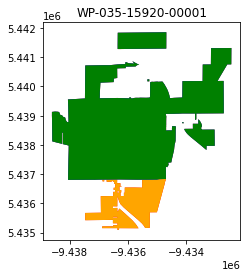

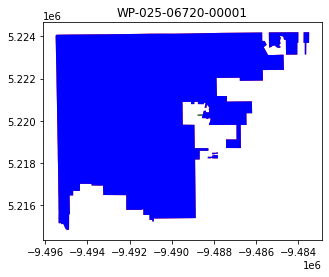

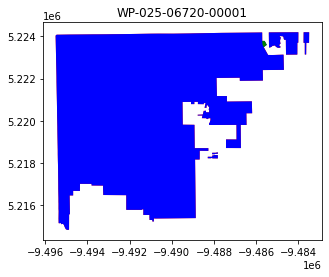

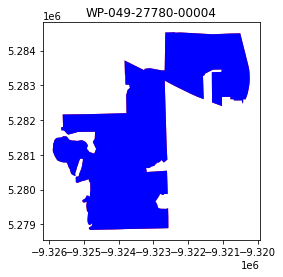

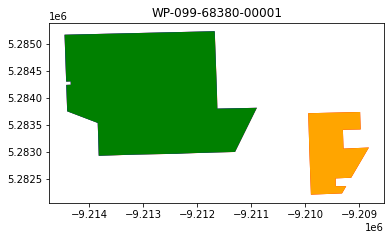

In [139]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .1):
        count += 1
        name = source_geoms.iat[i,0]
        
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [140]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(4753, 1)
0 precincts w/ a difference of 0 km^2
4748 precincts w/ a difference between 0 and .1 km^2
2 precincts w/ a difference between .1 and .5 km^2
0 precincts w/ a difference between .5 and 1 km^2
1 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
2 precincts w/ a difference greater than 5 km^2
